# Machine intelligence Project:
## Investigate a Dataset: Cleaning, analyzing, & visualizing a dataset and creating ML models for data predication



# 1) Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!gdown --id 1a9_rlIyB8x_rgvkODTDNuiSPDvb_8qOs

Downloading...
From: https://drive.google.com/uc?id=1a9_rlIyB8x_rgvkODTDNuiSPDvb_8qOs
To: /content/noshow.csv
100% 10.7M/10.7M [00:00<00:00, 55.4MB/s]


#### First, we will have a view of the data in the dataset we are working on, to explore the columns and the size of the dataset

In [ ]:
df = pd.read_csv('noshow.csv')
df.dropna()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.shape

(110527, 14)

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

#### Afterwards, we have looked at the datatypes of the columns and general numerical description about the data.

In [ ]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Note 1: The patient_id data type is float as shown before, so it must be changed to be int

In [ ]:
df['patient_id'] = df['patient_id'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110527 non-null  int64 
 1   appointment_id   110527 non-null  int64 
 2   gender           110527 non-null  object
 3   scheduled_day    110527 non-null  object
 4   appointment_day  110527 non-null  object
 5   age              110527 non-null  int64 
 6   neighbourhood    110527 non-null  object
 7   scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   diabetes         110527 non-null  int64 
 10  alcoholism       110527 non-null  int64 
 11  handicap         110527 non-null  int64 
 12  sms_received     110527 non-null  int64 
 13  no_show          110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


#### Note 2: scheduled_day & appointment_day datatype must be converted to datetime

In [ ]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date.astype('datetime64[ns]')

#### Note 3: Adding Weekday column where 0 represents Monday

In [ ]:
#0 is Monday
df["weekday"] = df["scheduled_day"].dt.dayofweek
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,weekday
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [ ]:
df["weekday"].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: weekday, dtype: int64

In [ ]:
x = df[df["alcoholism"] == 1]
x["neighbourhood"].value_counts()

SANTA MARTHA         344
DA PENHA             172
BONFIM               166
SÃO PEDRO            150
ROMÃO                125
                    ... 
SEGURANÇA DO LAR       2
REPÚBLICA              2
BARRO VERMELHO         2
NAZARETH               1
PONTAL DE CAMBURI      1
Name: neighbourhood, Length: 69, dtype: int64

#### Note 4: Adding waiting_days column which is the difference between appointment and scheduled day.
#### Note 5: Changing waiting_days type to int for further analysis

In [ ]:
df["waiting_days"] = (df["appointment_day"] - df["scheduled_day"])
df["waiting_days"] = (df["waiting_days"] / np.timedelta64(1, 'D')).astype(int)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,weekday,waiting_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,0


In [ ]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,weekday,waiting_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,179.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
 14  weekday          110

#### Now, this is a new csv file generated for the no-show dataset after the cleaning stage

In [ ]:
df.to_csv("Noshow_updated.csv")

# 2) Data visualization

## A- General Exploration
### To get to know the dataset better to be able to get insights of the dataset and answer the right question

In [ ]:
df["gender"].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

In [ ]:
num_unique_apps = len(df.appointment_id.unique())
all_dataset_rec_number = df.shape[0]
print('{} == {}'.format(num_unique_apps, all_dataset_rec_number))

110527 == 110527


### 1) What is the ratio between males and females?

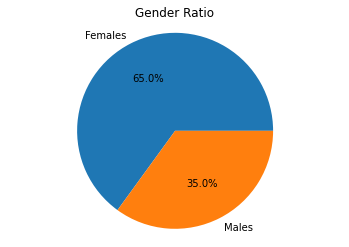

In [ ]:
data = df["gender"].value_counts()
# plt.ylabel("Count")
# plt.title("Gender");
my_labels = 'Females','Males'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.axis('equal')
plt.show()

### 2) What is the ratio between show and no-show?

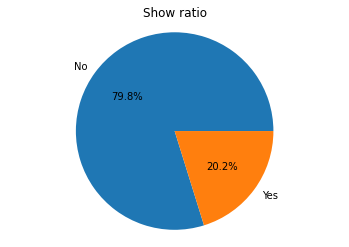

In [ ]:
data = df["no_show"].value_counts()
# plt.ylabel("Count")
# plt.title("Gender");
my_labels = 'No','Yes'
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.title('Show ratio')
plt.axis('equal')
plt.show()

### 3) What is the most frequent scheduled date?

Text(0.5, 1.0, "'Scheduled Date' Line chart")

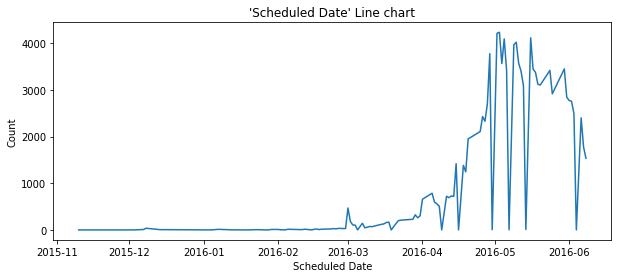

In [ ]:
# line chart plot for Scheduled Date
df["scheduled_day"].dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("Scheduled Date")
plt.ylabel("Count")
plt.title("'Scheduled Date' Line chart")

### 4) What is the most frequent appointment date?

Text(0.5, 1.0, "'Appointment Date' Line chart")

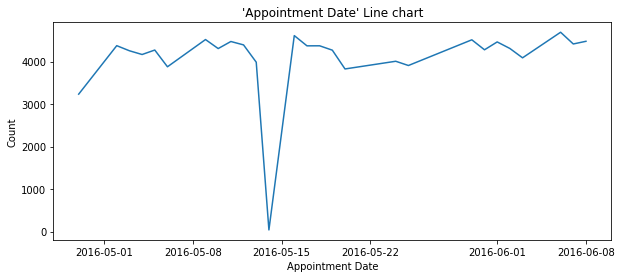

In [ ]:
# line chart plot for Appointment Date
df.appointment_day.dt.date.value_counts().plot(kind="line",figsize=(10,4));
plt.xlabel("Appointment Date")
plt.ylabel("Count")
plt.title("'Appointment Date' Line chart")

### 5) What is the relation between scheduled day and appointment day? 

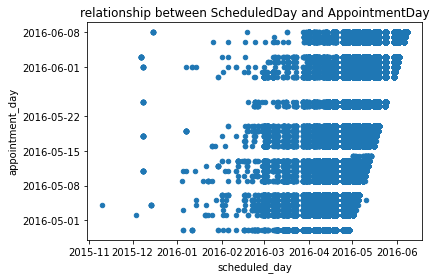

In [ ]:
# Scatter plot for the relationship between ScheduledDay and AppointmentDay
df.plot(kind="scatter", x="scheduled_day",y="appointment_day");
plt.title("relationship between ScheduledDay and AppointmentDay");

### 6) How many patients for each age?

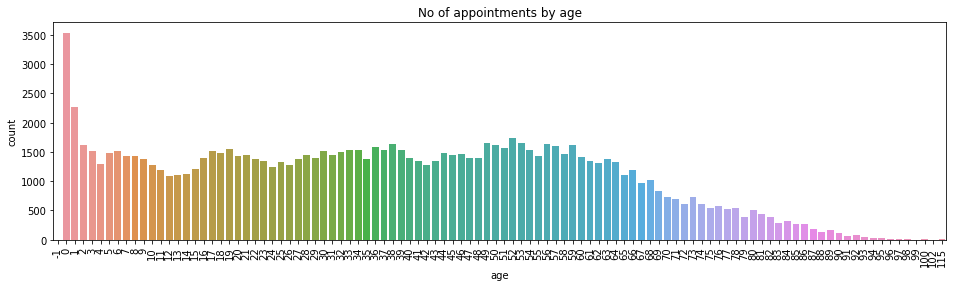

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("No of appointments by age")
plt.show()

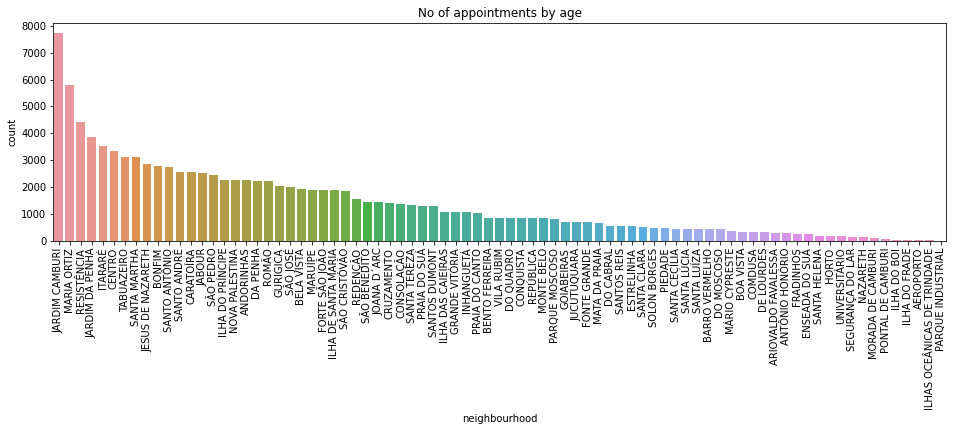

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.neighbourhood,order=df.neighbourhood.value_counts().index)
ax.set_title("No of appointments by age")
plt.show()

### 7) What is the count of patients in each neighbourhood?

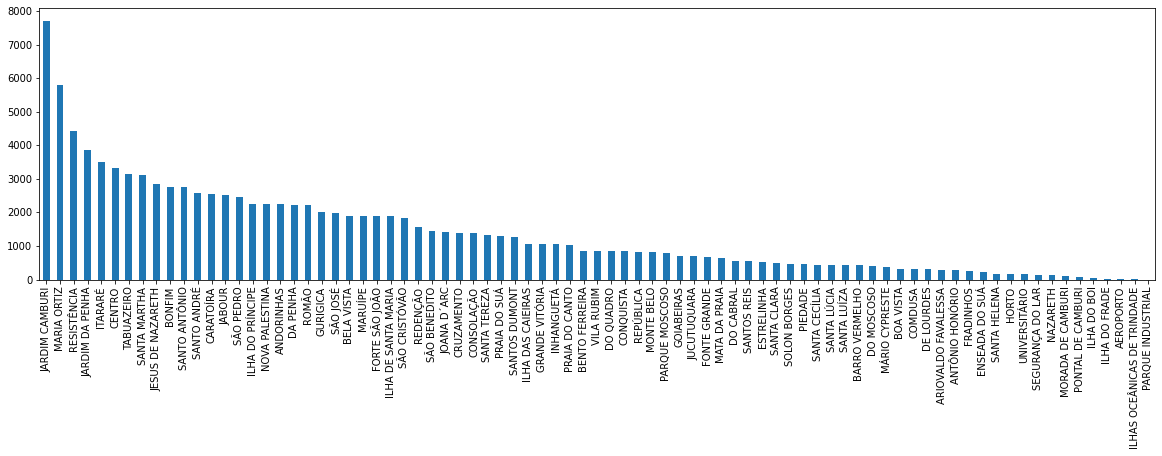

In [ ]:
df.neighbourhood.value_counts().plot(kind="bar",figsize=(20,5));

### 8) What is the number of patients by number of awaiting days?

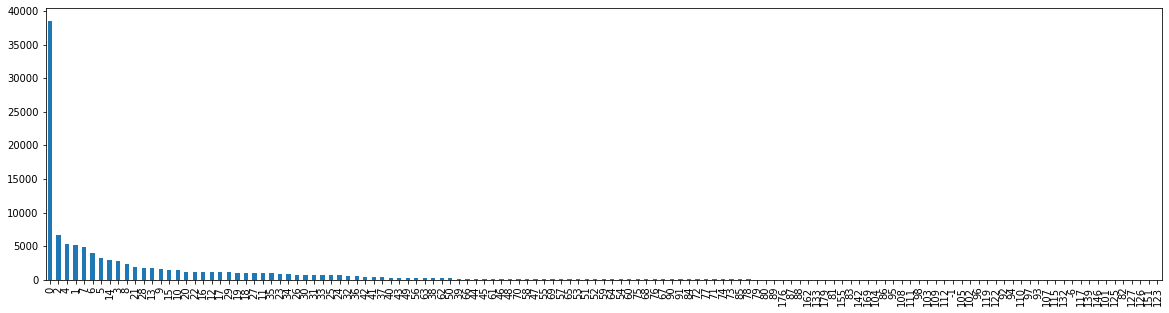

In [ ]:
df.waiting_days.value_counts().plot(kind="bar",figsize=(20,5));

## General exploration: Insights of data
     1) Females represent 65% of the dataset and Males represent 35% only.
     2) Only 20.2% of patients showed, while 79.8% didnt show.
     3) The most scheduled date is mainly between months 5 and 6 of 2016
     4) The appointment dates mainly have the same number of patients yet, there is a huge drop near 15/5/2016
     5) The majority of patients are of really young age
     6) Most of the patients are from Jardim Camburi
     7) The highest number of patients is when the awaiting days is 0

## B- Explorartory Data Analysis
### After general exploration of the dataset, our goal now is to to find why patients miss their appointment, what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

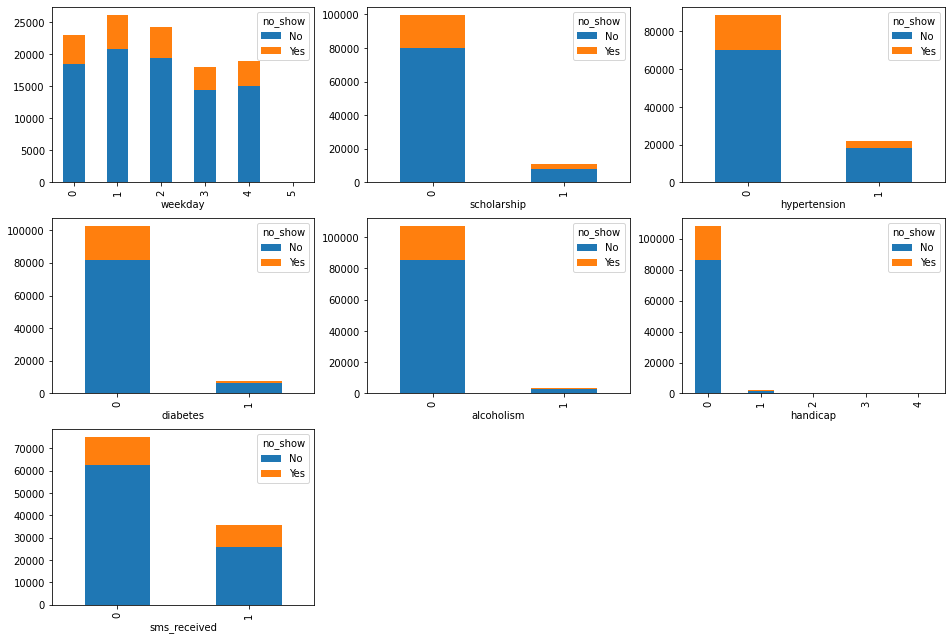

In [ ]:
# First, let's look at categorical variables
categorical_vars = ['weekday', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

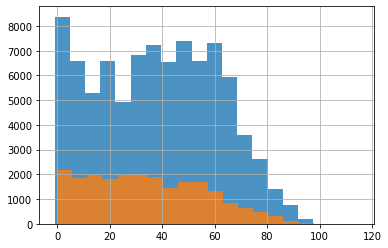

In [ ]:
# Numerical variables
# Age:
df.age[df.no_show=="No"].hist(alpha=0.8, bins=20);
df.age[df.no_show=="Yes"].hist(alpha=0.8, bins=20);

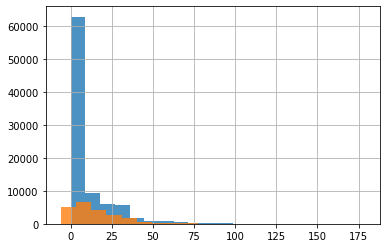

In [ ]:
# Waiting days
df.waiting_days[df.no_show=="No"].hist(alpha=0.8, bins=20);
df.waiting_days[df.no_show=="Yes"].hist(alpha=0.8, bins=20);

## Exploratory Data Analysis: Insights of data
     1) For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger than others impact on show / no-show characteristics.
     
     2) For numerical variables, such as age, kids and patients in their 60s, 70s, and 80s are more likely to show to their appointments
     
     3) For numerical variable, such as waiting days (the most affecting variable in our dataset), shows that when the waiting day is shorter, the patient is more likely to show up for their appointments.

# 3) ML models for data prediction

#### 1- Convert categorical data to numerical data for the models

In [ ]:
y_labels = {"no_show" : {"Yes": 1 , "No":0}}
df.replace(y_labels , inplace= True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,weekday,waiting_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,0


In [ ]:
y_labels = {"gender" : {"F": 1 , "M":0}}
df.replace(y_labels , inplace= True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,weekday,waiting_days
0,29872499824296,5642903,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,0
1,558997776694438,5642503,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,0
2,4262962299951,5642549,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,0
3,867951213174,5642828,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,0
4,8841186448183,5642494,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,0


In [ ]:
df["no_show"].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

#### 2- Split the data into actual data and test data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


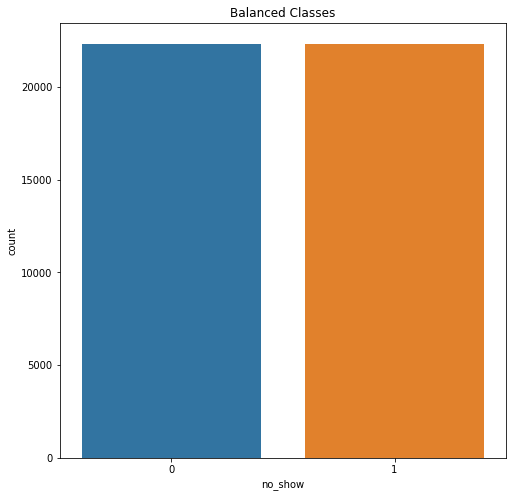

In [ ]:
df1 = df
shuffled_df = df1.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
show_df = df1.loc[df1['no_show'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
noshow_df = df1.loc[df1['no_show'] == 0].sample(n=22319,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([show_df, noshow_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('no_show', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

#### We have used age and waiting_days columns only as they are the most affecting factors according to our analysis

# Using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["neighbourhood"] = encoder.fit_transform(df["neighbourhood"])
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,weekday,waiting_days
0,29872499824296,5642903,1,2016-04-29,2016-04-29,62,39,0,1,0,0,0,0,0,4,0
1,558997776694438,5642503,0,2016-04-29,2016-04-29,56,39,0,0,0,0,0,0,0,4,0
2,4262962299951,5642549,1,2016-04-29,2016-04-29,62,45,0,0,0,0,0,0,0,4,0
3,867951213174,5642828,1,2016-04-29,2016-04-29,8,54,0,0,0,0,0,0,0,4,0
4,8841186448183,5642494,1,2016-04-29,2016-04-29,56,39,0,1,1,0,0,0,0,4,0


In [ ]:
df["neighbourhood"].nunique()

81

## A- Logistic Regression Model

In [ ]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'weekday', 'waiting_days'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[['gender', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'weekday', 'waiting_days']]
y = df['no_show']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
print("Accuracy={:.2f}%".format(logreg.score(X_test, y_test)*100))

Accuracy=79.63%


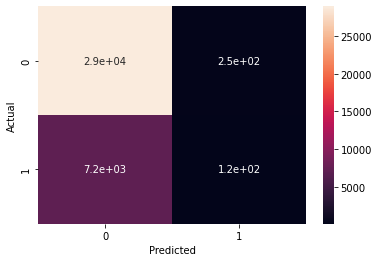

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     29175
           1       0.33      0.02      0.03      7299

    accuracy                           0.80     36474
   macro avg       0.56      0.50      0.46     36474
weighted avg       0.71      0.80      0.72     36474



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5)
print("Average Accuracy:{:.2f}%".format((sum(scores)/len(scores))*100))

Average Accuracy:79.31%


## B- KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

l1=[0]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i) #build our knn classifier
  knn.fit(X_train,y_train) #Training KNN classifier
  y_pred=knn.predict(X_test)  #Testing
  p = accuracy_score(y_pred,y_test)
  if(p > max(l1)):
    y_pred2 = y_pred
    print("Number of Neighbours = ",i,' Accuracy=',p)
    l1.append(p)
    finalknn = knn
    z,l = i,p
print("-----------------------------------")
print(f"KNN had an accuracy of {p} at {i} Neighbours")

Number of Neighbours =  1  Accuracy= 0.7360585622635302
Number of Neighbours =  2  Accuracy= 0.7872731260624006
Number of Neighbours =  4  Accuracy= 0.7877117947030762
Number of Neighbours =  6  Accuracy= 0.7891923013653561
Number of Neighbours =  8  Accuracy= 0.791385644568734
Number of Neighbours =  10  Accuracy= 0.7918243132094095
Number of Neighbours =  12  Accuracy= 0.7922903986401272
Number of Neighbours =  14  Accuracy= 0.7927839008608872
Number of Neighbours =  16  Accuracy= 0.793880572462576
-----------------------------------
KNN had an accuracy of 0.7916598124691561 at 19 Neighbours


# PCA Dimension Reduction

In [ ]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'weekday', 'waiting_days'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df1 = df[['gender', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
      'weekday', 'waiting_days']]
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df1))
df_pca.head()

,0,1
0,24.466802,2.879774
1,18.616471,1.522741
2,23.103368,8.722575
3,-31.487638,5.302659
4,18.630106,1.526538


In [ ]:
df_pca.columns

RangeIndex(start=0, stop=2, step=1)

## C- Decision Tree Model with PCA

In [ ]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df_pca[[0,1]]
y = df['no_show']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

model = DecisionTreeClassifier()  
model.fit(x_train, y_train) 
y_pred3=model.predict(x_test)
print("score:{:.2f}%".format(accuracy_score(y_test, y_pred3)*100))

score:74.05%


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Average Accuracy: {:.2f}".format((sum(scores)/len(scores))*100))

Average Accuracy: 71.99


# Decision Tree without Dimension Reduction

In [ ]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'weekday', 'waiting_days'],
      dtype='object')

In [ ]:
X = df[['gender', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'weekday', 'waiting_days']]
y = df['no_show']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

model = DecisionTreeClassifier()  
model.fit(x_train, y_train) 
y_pred3=model.predict(x_test)
print("score:{:.2f}%".format(accuracy_score(y_test, y_pred3)*100))

score:73.21%


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Average Accuracy:",(sum(scores)/len(scores))*100)

Average Accuracy: 71.36355823608456


#### The Decision Tree Classifier got to an accuracy of 78.37%

## D- Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
l1 = [0]
for i in range(1,51):
  clf2=RandomForestClassifier(n_estimators=i)
  clf2.fit(x_train, y_train) 
  y_pred=clf2.predict(x_test)
  if(accuracy_score(y_test, y_pred)>max(l1)):
    print("score:{:.2f}%".format(accuracy_score(y_test, y_pred)*100),end = " ")
    print(i)
    Randomf = clf2
  l1.append(accuracy_score(y_test, y_pred))
y_pred4 = Randomf.predict(x_test)
print("score of Best Random forest:{:.2f}%".format(accuracy_score(y_test, y_pred4)*100))

score:72.74% 1
score:77.68% 2
score:77.77% 10
score:77.77% 18
score:77.84% 20
score:78.08% 28
score of Best Random forest:78.08%


# E- SVM Polynomial Kernel

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly') # Polynomial Kernel
clf.fit(X_train, y_train)
y_pred5 = clf.predict(X_test)
print("Accuracy: {:.2f} %".format(metrics.accuracy_score(y_test, y_pred5)*100))

Accuracy: 79.99 %


# G- Ridge Classifier 

In [ ]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(X_train, y_train)
y_pred6 = clf.predict(X_test)
print("Accuracy:{:.2f} %".format(clf.score(X_test, y_test)*100))

Accuracy:79.79 %


# Ensembling of  Logistic Regression,KNN, Decision Tree, Random Forest, Ridge Classifier (No. is odd to avoid equal number of votes) 

In [ ]:
import statistics as st
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, st.mode([y_pred1[i], y_pred2[i], y_pred3[i], y_pred4[i], y_pred6[i]]))
print("Accuracy:{:.2f} %".format(metrics.accuracy_score(y_test, final_pred)*100))

Accuracy:79.96 %
